In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier


In [2]:
train1 = pd.read_csv('student-mat.csv')
train2 = pd.read_csv('student-por.csv')

In [3]:
train1.head()

,college,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,21,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,20,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,19,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,19,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,19,14,19
4,GP,F,17,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data = pd.read_csv('students.csv')
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,subject_Maths,subject_Portuguese,FinalGrade,Grade1,Grade2
0,18,4,4,2,2,0,4,3,4,1,...,1,1,0,1,0,0,1,4,Failure,Satisfactory
1,19,1,1,1,2,0,5,3,3,1,...,1,0,1,1,0,0,1,4,Poor,Satisfactory
2,20,1,1,1,2,0,4,3,2,2,...,1,0,1,1,0,0,1,4,Satisfactory,Satisfactory
3,20,4,2,1,3,0,3,2,2,1,...,1,0,1,0,1,0,1,4,Satisfactory,Satisfactory
4,20,3,3,1,2,0,4,3,2,1,...,1,1,0,1,0,0,1,4,Satisfactory,Satisfactory


In [5]:
data = pd.read_csv('students.csv')
data.head()
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure' 
data.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,subject_Maths,subject_Portuguese,FinalGrade,Grade1,Grade2
0,18,4,4,2,2,0,4,3,4,1,...,1,1,0,1,0,0,1,Satisfactory,Failure,Satisfactory
1,19,1,1,1,2,0,5,3,3,1,...,1,0,1,1,0,0,1,Satisfactory,Poor,Satisfactory
2,20,1,1,1,2,0,4,3,2,2,...,1,0,1,1,0,0,1,Satisfactory,Satisfactory,Satisfactory
3,20,4,2,1,3,0,3,2,2,1,...,1,0,1,0,1,0,1,Satisfactory,Satisfactory,Satisfactory
4,20,3,3,1,2,0,4,3,2,1,...,1,1,0,1,0,0,1,Satisfactory,Satisfactory,Satisfactory


In [6]:
# label encode final_grade
le = preprocessing.LabelEncoder()
data.FinalGrade = le.fit_transform(data.FinalGrade)

In [7]:
X = data.drop(labels=['FinalGrade','G3'],axis=1)

y = data.FinalGrade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [8]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [9]:
len(list(X_train))

71

In [10]:
X_train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
194,20,4,3,1,2,0,3,4,3,2,...,0,0,0,0,1,0,0,0,1,0
440,20,1,1,2,2,0,5,4,5,4,...,0,0,0,1,0,0,1,0,0,0
876,20,2,3,1,2,0,5,3,3,1,...,0,0,0,0,1,0,0,0,0,1
379,19,2,2,4,1,0,4,4,5,5,...,0,0,0,0,1,0,0,0,1,0
221,20,4,3,1,2,0,1,3,2,1,...,0,0,0,0,1,1,0,0,0,0
691,19,4,4,1,2,0,4,3,3,1,...,1,0,0,0,0,0,0,0,0,0
601,18,2,2,2,2,0,1,3,1,1,...,0,0,0,1,0,0,0,0,1,0
930,20,3,2,1,1,1,4,4,4,3,...,0,0,0,0,1,0,0,0,1,0
862,21,2,2,1,2,1,4,4,4,2,...,0,0,0,1,0,0,0,0,1,0
178,19,1,1,4,2,0,5,3,5,1,...,0,0,0,1,0,0,0,0,1,0


In [11]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.8328767123287671 , Cross Validation Score : 0.7929936305732485


In [12]:
# find a good # of estimators


ne=[]
for i in range(1,61):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

c:\users\manasaav\datasciencenew\anaconda3\envs\tensor3.6\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\manasaav\datasciencenew\anaconda3\envs\tensor3.6\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\manasaav\datasciencenew\anaconda3\envs\tensor3.6\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\manasaav\datasciencenew\anaconda3\envs\tensor3.6\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

c:\users\manasaav\datasciencenew\anaconda3\envs\tensor3.6\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\manasaav\datasciencenew\anaconda3\envs\tensor3.6\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\manasaav\datasciencenew\anaconda3\envs\tensor3.6\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\manasaav\datasciencenew\anaconda3\envs\tensor3.6\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

17    0.843949
dtype: float64

In [13]:
# find a good # of min_samples_leaf


ne=[]
for i in range(1,60):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

1    0.843949
dtype: float64

In [14]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Raondom Forest Model Score : 0.958904109589041 , Cross Validation Score : 0.8471337579617835


In [15]:

svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.8438356164383561 , Cross Validation Score : 0.8280254777070064


c:\users\manasaav\datasciencenew\anaconda3\envs\tensor3.6\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:

lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [17]:
# find optimal # of features to use in the model


ks=[]
for i in range(1,61):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,61)))
ks

1     0.834395
2     0.834395
3     0.050955
4     0.050955
5     0.050955
6     0.812102
7     0.455414
8     0.821656
9     0.837580
10    0.802548
11    0.783439
12    0.840764
13    0.834395
14    0.834395
15    0.834395
16    0.831210
17    0.363057
18    0.824841
19    0.828025
20    0.079618
21    0.079618
22    0.050955
23    0.050955
24    0.050955
25    0.050955
26    0.050955
27    0.060510
28    0.060510
29    0.050955
30    0.050955
31    0.050955
32    0.050955
33    0.054140
34    0.060510
35    0.079618
36    0.089172
37    0.076433
38    0.054140
39    0.054140
40    0.050955
41    0.054140
42    0.054140
43    0.054140
44    0.050955
45    0.050955
46    0.050955
47    0.054140
48    0.050955
49    0.050955
50    0.050955
51    0.057325
52    0.050955
53    0.076433
54    0.085987
55    0.073248
56    0.082803
57    0.165605
58    0.168790
59    0.216561
60         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

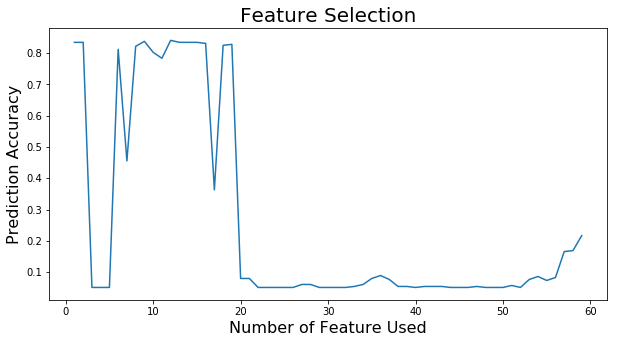

In [19]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selection', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [20]:
ks.where(ks==ks.max()).dropna()

12    0.840764
dtype: float64

In [21]:
# final model
sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.8287671232876712 , Cross Validation Score : 0.4554140127388535


In [22]:

ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.7780821917808219 , Cross Validation Score : 0.7802547770700637


In [23]:

sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.7493150684931507 , Cross Validation Score : 0.7866242038216561


c:\users\manasaav\datasciencenew\anaconda3\envs\tensor3.6\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [24]:
from xgboost import XGBClassifier
from xgboost import plot_importance
def XGBoost(x_train,y_train,x_val,y_val):
    model = XGBClassifier()
    model = XGBClassifier(learning_rate=0.1,n_estimators=100)
    mf = model.fit(x_train,y_train)
    y_pred=model.predict(x_val)
    y_predict = mf.predict_proba(x_val)
    print("XGBoost Train data Score" , ":" , mf.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , mf.score(x_val, y_val))
    
    
    # plot feature importance
    fig, ax = plt.subplots(figsize=(10, 20))
    plot_importance(model, ax=ax)

    plt.show()
    return model

XGBoost Train data Score : 0.952054794520548 , Validation data Score : 0.821656050955414


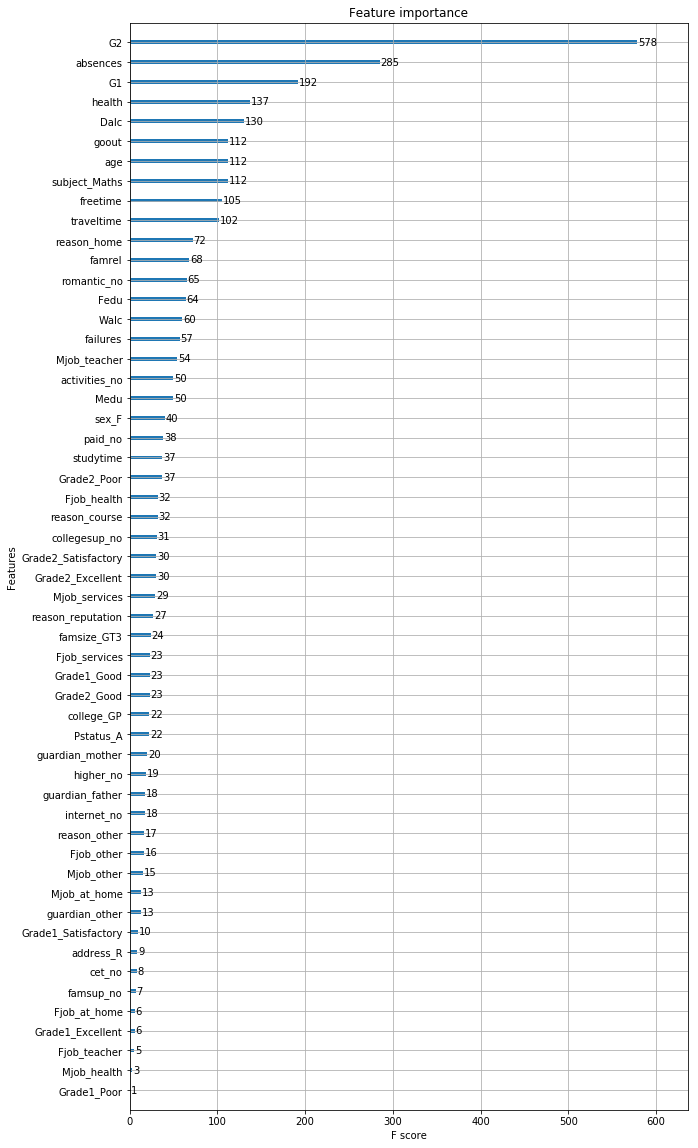

In [25]:
model = XGBoost(X_train,y_train,X_test,y_test)